In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis (EDA) for Air Quality Prediction

# **Introduction**


- This notebook presents a comprehensive **Exploratory Data Analysis (EDA)** on meteorological and air quality data.  
- The analysis covers multiple stages, including **data cleaning**, **descriptive statistics**, **visualization**, and **correlation analysis**, aiming to explore how meteorological factors — such as **temperature**, **humidity**, **wind speed**, **pressure**, **cloud coverage**, and **precipitation** — affect the **Air Quality Index (AQI)**.  

- The insights derived from this EDA provide a solid foundation for building predictive models for **air quality forecasting** and for understanding the environmental dynamics that influence pollution levels.

#### Import libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Understanding

- In this step, I load the dataset `full_data.csv` into a DataFrame to begin the analysis.  
- Then, I convert the **`Local Time`** column to a datetime format so that I can handle time-based operations more easily.  
- Finally, I set a **multi-index** using `Local Time` and `Train Name`, which helps organize the data both **chronologically** and **by location**, making it easier to explore and analyze later on.

In [62]:
df = pd.read_csv("/content/drive/MyDrive/AirQuality/preprocess_data/full_data.csv")
df['Local Time'] = pd.to_datetime(df['Local Time'], errors='coerce')
df = df.set_index(['Local Time', 'Train Name']).sort_index() # Set multi-index and sort
df

Aqi      Co   No2     O3   Pm10   Pm25    So2  \
Local Time          Train Name                                                  
2023-01-01 00:00:00 Chơn Thành   44   131.1   1.0   91.3   16.7  10.67    3.7   
                    Côn Sơn      69   128.8   1.0  122.0   37.0  20.67    9.3   
                    Cần Giuộc   169   320.8  79.3   24.3  100.7  69.33  141.0   
                    Cần Giờ      77   159.1  12.7   96.3   38.3  24.33   21.3   
                    Củ Chi      169   320.8  79.3   24.3  100.7  69.33  141.0   
...                             ...     ...   ...    ...    ...    ...    ...   
2025-09-30 06:00:00 Tân Túc      51   154.3  34.0   16.7   56.0   6.00   50.3   
                    Uyen Hung    51    64.6   4.0   48.0   56.0   6.00   11.0   
                    Vĩnh An      26    72.8   4.7   38.0    6.7   6.33    8.7   
                    Vũng Tàu     17  1008.0  46.0   36.8   16.0   4.00   68.0   
2025-09-30 07:00:00 Côn Sơn      50    51.9   1.0   92.0   16.0  12.00    3.0   

                                Clouds  Precipitation  Pressure  \
Local Time          Train Name                                    
2023-01-01 00:00:00 Chơn Thành    99.0           0.00    1008.0   
                    Côn Sơn       70.0           0.00    1013.0   
                    Cần Giuộc     41.0           0.00    1013.0   
                    Cần Giờ      100.0           0.25    1014.0   
                    Củ Chi        99.0           0.00    1014.0   
...                                ...            ...       ...   
2025-09-30 06:00:00 Tân Túc       34.0           0.50    1010.0   
                    Uyen Hung    100.0           0.25    1005.0   
                    Vĩnh An      100.0           0.25    1005.0   
                    Vũng Tàu      98.0           0.00    1010.0   
2025-09-30 07:00:00 Côn Sơn       97.0           0.50    1013.0   

                                Relative Humidity  Temperature  UV_Index  \
Local Time          Train Name                                             
2023-01-01 00:00:00 Chơn Thành               62.0         23.7       0.0   
                    Côn Sơn                  90.0         24.5       0.0   
                    Cần Giuộc                67.0         24.2       0.0   
                    Cần Giờ                  87.0         24.4       0.0   
                    Củ Chi                   59.0         24.4       0.0   
...                                           ...          ...       ...   
2025-09-30 06:00:00 Tân Túc                  93.0         25.7       0.6   
                    Uyen Hung                98.0         25.2       0.6   
                    Vĩnh An                  96.0         25.2       0.6   
                    Vũng Tàu                 92.0         26.3       0.7   
2025-09-30 07:00:00 Côn Sơn                  89.0         24.1       0.6   

                                Wind Speed  Latitude  Longitude  
Local Time          Train Name                                   
2023-01-01 00:00:00 Chơn Thành        3.20  11.42821  106.63536  
                    Côn Sơn           0.00  31.37762  120.95431  
                    Cần Giuộc         1.33  10.60857  106.67135  
                    Cần Giờ           1.20  10.41115  106.95474  
                    Củ Chi            2.80  10.97333  106.49325  
...                                    ...       ...        ...  
2025-09-30 06:00:00 Tân Túc           1.36  10.69541  106.59128  
                    Uyen Hung         1.60  11.08416  106.78834  
                    Vĩnh An           2.00  11.08901  107.03516  
                    Vũng Tàu          1.20  10.34599  107.08426  
2025-09-30 07:00:00 Côn Sơn           2.40  31.37762  120.95431  

[941433 rows x 16 columns]

- In this step, I take a quick look at the dataset to understand its overall structure.  
- I check the number of rows and columns, review the column names, and display the **time range** covered by the data.  
- Finally, I also examine how many **locations** (or monitoring stations) are included and print a few sample names to get a better sense of the dataset.

In [63]:
print(df.shape)
print(df.columns)

(941433, 16)
Index(['Aqi', 'Co', 'No2', 'O3', 'Pm10', 'Pm25', 'So2', 'Clouds',
       'Precipitation', 'Pressure', 'Relative Humidity', 'Temperature',
       'UV_Index', 'Wind Speed', 'Latitude', 'Longitude'],
      dtype='object')


In [64]:
# Display date range
print("From:", df.index.get_level_values('Local Time').min())
print("To:", df.index.get_level_values('Local Time').max())

From: 2023-01-01 00:00:00
To: 2025-09-30 07:00:00


In [65]:
# Display number of locations and sample list
print("Number of locations:", df.index.get_level_values('Train Name').nunique())
print("Sample locations:", df.index.get_level_values('Train Name').unique()[:10])

Number of locations: 40
Sample locations: Index(['Chơn Thành', 'Côn Sơn', 'Cần Giuộc', 'Cần Giờ', 'Củ Chi', 'Dĩ An',
       'Dầu Tiếng', 'Gia Ray', 'Ho Chi Minh City', 'Hóc Môn'],
      dtype='object', name='Train Name')


- I define the **target variable** that I want to predict, which is the **Air Quality Index (AQI)**.  
- Then, I select the **meteorological features** that may influence air quality — including temperature, humidity, wind speed, pressure, cloud coverage, and precipitation.  
- These features will later be used as predictors in the modeling process.

In [66]:
target = 'AQI'
features = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Pressure', 'Clouds', 'Precipitation']
print("Target:", target)
print("Features:", features)

Target: AQI
Features: ['Temperature', 'Relative Humidity', 'Wind Speed', 'Pressure', 'Clouds', 'Precipitation']


### 2. Data Cleaning

In [67]:
# Remove unnecessary columns to clean the dataset
columns_to_drop = ['Unnamed: 0', 'UTC Time_x', 'UTC Time_y']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df

Aqi      Co   No2     O3   Pm10   Pm25    So2  \
Local Time          Train Name                                                  
2023-01-01 00:00:00 Chơn Thành   44   131.1   1.0   91.3   16.7  10.67    3.7   
                    Côn Sơn      69   128.8   1.0  122.0   37.0  20.67    9.3   
                    Cần Giuộc   169   320.8  79.3   24.3  100.7  69.33  141.0   
                    Cần Giờ      77   159.1  12.7   96.3   38.3  24.33   21.3   
                    Củ Chi      169   320.8  79.3   24.3  100.7  69.33  141.0   
...                             ...     ...   ...    ...    ...    ...    ...   
2025-09-30 06:00:00 Tân Túc      51   154.3  34.0   16.7   56.0   6.00   50.3   
                    Uyen Hung    51    64.6   4.0   48.0   56.0   6.00   11.0   
                    Vĩnh An      26    72.8   4.7   38.0    6.7   6.33    8.7   
                    Vũng Tàu     17  1008.0  46.0   36.8   16.0   4.00   68.0   
2025-09-30 07:00:00 Côn Sơn      50    51.9   1.0   92.0   16.0  12.00    3.0   

                                Clouds  Precipitation  Pressure  \
Local Time          Train Name                                    
2023-01-01 00:00:00 Chơn Thành    99.0           0.00    1008.0   
                    Côn Sơn       70.0           0.00    1013.0   
                    Cần Giuộc     41.0           0.00    1013.0   
                    Cần Giờ      100.0           0.25    1014.0   
                    Củ Chi        99.0           0.00    1014.0   
...                                ...            ...       ...   
2025-09-30 06:00:00 Tân Túc       34.0           0.50    1010.0   
                    Uyen Hung    100.0           0.25    1005.0   
                    Vĩnh An      100.0           0.25    1005.0   
                    Vũng Tàu      98.0           0.00    1010.0   
2025-09-30 07:00:00 Côn Sơn       97.0           0.50    1013.0   

                                Relative Humidity  Temperature  UV_Index  \
Local Time          Train Name                                             
2023-01-01 00:00:00 Chơn Thành               62.0         23.7       0.0   
                    Côn Sơn                  90.0         24.5       0.0   
                    Cần Giuộc                67.0         24.2       0.0   
                    Cần Giờ                  87.0         24.4       0.0   
                    Củ Chi                   59.0         24.4       0.0   
...                                           ...          ...       ...   
2025-09-30 06:00:00 Tân Túc                  93.0         25.7       0.6   
                    Uyen Hung                98.0         25.2       0.6   
                    Vĩnh An                  96.0         25.2       0.6   
                    Vũng Tàu                 92.0         26.3       0.7   
2025-09-30 07:00:00 Côn Sơn                  89.0         24.1       0.6   

                                Wind Speed  Latitude  Longitude  
Local Time          Train Name                                   
2023-01-01 00:00:00 Chơn Thành        3.20  11.42821  106.63536  
                    Côn Sơn           0.00  31.37762  120.95431  
                    Cần Giuộc         1.33  10.60857  106.67135  
                    Cần Giờ           1.20  10.41115  106.95474  
                    Củ Chi            2.80  10.97333  106.49325  
...                                    ...       ...        ...  
2025-09-30 06:00:00 Tân Túc           1.36  10.69541  106.59128  
                    Uyen Hung         1.60  11.08416  106.78834  
                    Vĩnh An           2.00  11.08901  107.03516  
                    Vũng Tàu          1.20  10.34599  107.08426  
2025-09-30 07:00:00 Côn Sơn           2.40  31.37762  120.95431  

[941433 rows x 16 columns]

In [68]:
# Convert selected columns to numeric data types to ensure consistency
numeric_cols = ['AQI', 'Temperature', 'Relative Humidity', 'Wind Speed', 'Pressure', 'Clouds', 'Precipitation']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

,0
Aqi,int64
Co,float64
No2,float64
O3,float64
Pm10,float64
Pm25,float64
So2,float64
Clouds,float64
Precipitation,float64
Pressure,float64


In [69]:
# Check the number of missing values in each column
df.isnull().sum()

,0
Aqi,0
Co,0
No2,0
O3,0
Pm10,0
Pm25,0
So2,0
Clouds,18
Precipitation,0
Pressure,16


- After identifying missing values in the dataset, I handle them using two main strategies.  
- First, I remove any columns that have more than **50% missing data** to maintain data quality.  
- Then, for the remaining columns, I apply **time-based interpolation** on weather-related features (like temperature and humidity) to fill gaps smoothly over time.  
- For more stable variables such as pressure and cloud coverage, I fill missing values with the **mean value per location**.  
- This approach helps preserve the dataset’s temporal and spatial consistency while minimizing data loss.

In [70]:
MISSING_THRESHOLD = 0.5

# Calculate missing ratio
missing_ratio = df.isna().mean()

# Drop columns with >50% missing values
cols_to_drop = missing_ratio[missing_ratio > MISSING_THRESHOLD].index
df = df.drop(columns=cols_to_drop)
print("Dropped columns:", list(cols_to_drop))

# Fill time-dependent columns using interpolation
interpolate_cols = ["Relative Humidity", "Temperature", "UV_Index", "Wind Speed"]

# Fill stable columns with mean per location
mean_fill_cols = ["Clouds", "Precipitation", "Pressure"]

def interpolate_time(g):
    g = g.reset_index()
    g = g.loc[~g['Local Time'].duplicated()]
    g = g.set_index(pd.to_datetime(g['Local Time'])).sort_index()
    g[interpolate_cols] = g[interpolate_cols].interpolate(method='time')
    return g.set_index(['Local Time', 'Train Name'])[interpolate_cols]
df[interpolate_cols] = (
    df.groupby(level='Train Name', group_keys=False)
      .apply(interpolate_time))
df[mean_fill_cols] = (
    df.groupby(level='Train Name')[mean_fill_cols]
      .transform(lambda g: g.fillna(g.mean()))
)

print("Remaining missing values per column:")
print(df.isna().sum())

Dropped columns: []
Remaining missing values per column:
Aqi                  0
Co                   0
No2                  0
O3                   0
Pm10                 0
Pm25                 0
So2                  0
Clouds               0
Precipitation        0
Pressure             0
Relative Humidity    0
Temperature          0
UV_Index             0
Wind Speed           0
Latitude             0
Longitude            0
dtype: int64


### 3. Descriptive Statistics

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aqi,941433.0,89.648231,103.094185,4.00000,43.00000,61.00000,87.00000,500.00000
Co,941433.0,694.169848,2686.230157,0.00000,65.00000,96.30000,156.00000,15376.00000
No2,941433.0,33.217395,73.892547,0.00000,4.00000,14.00000,39.00000,955.00000
O3,941433.0,44.332878,37.214011,0.00000,9.70000,40.00000,70.00000,652.00000
Pm10,941433.0,103.533332,265.516095,0.00000,20.00000,31.30000,54.00000,1231.30000
Pm25,941433.0,67.846012,214.472181,0.00000,8.00000,14.00000,24.00000,985.00000
So2,941433.0,47.122165,92.154369,0.00000,9.70000,20.00000,48.30000,721.00000
Clouds,941433.0,63.141385,30.891789,0.00000,36.00000,65.00000,93.00000,100.00000
Precipitation,941433.0,0.291216,0.843333,0.00000,0.00000,0.00000,0.25000,32.00000
Pressure,941433.0,1007.182778,5.031983,982.00000,1006.00000,1008.00000,1010.00000,1044.00000


**Outlier Detection for AQI**

- In this step, I apply an interquartile range (IQR)-based method to detect potential outliers in the **AQI** values.  
- Specifically, I calculate the 20th and 80th percentiles (Q1 and Q3) and define the acceptable range using 1.5 × IQR.  
- Any AQI values outside this range are considered outliers.

In [72]:
def detect_outliers(series):
    Q1 = series.quantile(0.2)
    Q3 = series.quantile(0.8)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

outliers_aqi = detect_outliers(df['Aqi'])
print(f"Number of AQI outliers detected: {len(outliers_aqi)}")

Number of AQI outliers detected: 55819


- A total of **55,819 outliers** were detected out of **941,433 records**, which accounts for roughly **6%** of the dataset.  
- This proportion indicates a noticeable number of extreme AQI readings — likely representing **pollution peaks** or **measurement anomalies**.  
- Depending on the modeling objective, these outliers may either be retained (to capture real pollution events) or treated (to improve model stability).

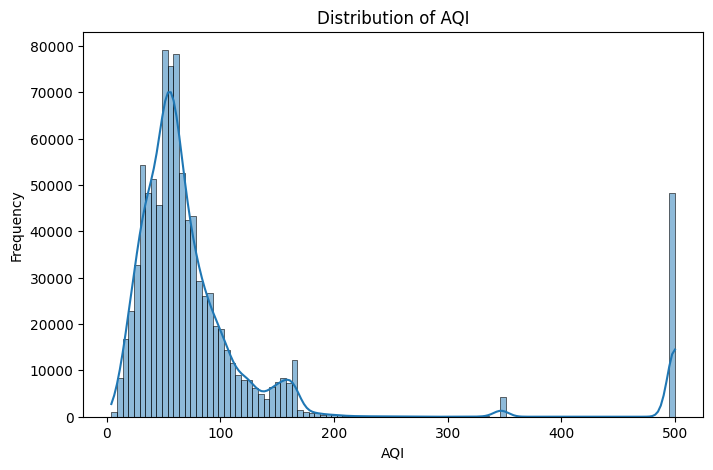

In [73]:
# Plot the distribution of AQI values with a histogram and KDE curve
plt.figure(figsize=(8,5))
sns.histplot(df['Aqi'], bins=100, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.savefig("AQI_dist")
plt.show()

- The histogram shows that the **AQI values are heavily right-skewed**, with most observations concentrated in the lower range (below 150).  
- This indicates that the majority of recorded air quality levels fall within the **Good to Moderate** categories.  

- However, a few noticeable peaks appear near **AQI = 500**, suggesting the presence of **extreme pollution events** or potential **measurement artifacts**.  
- Such high-end spikes align with the earlier outlier detection results and highlight the importance of handling these extreme cases carefully during modeling.

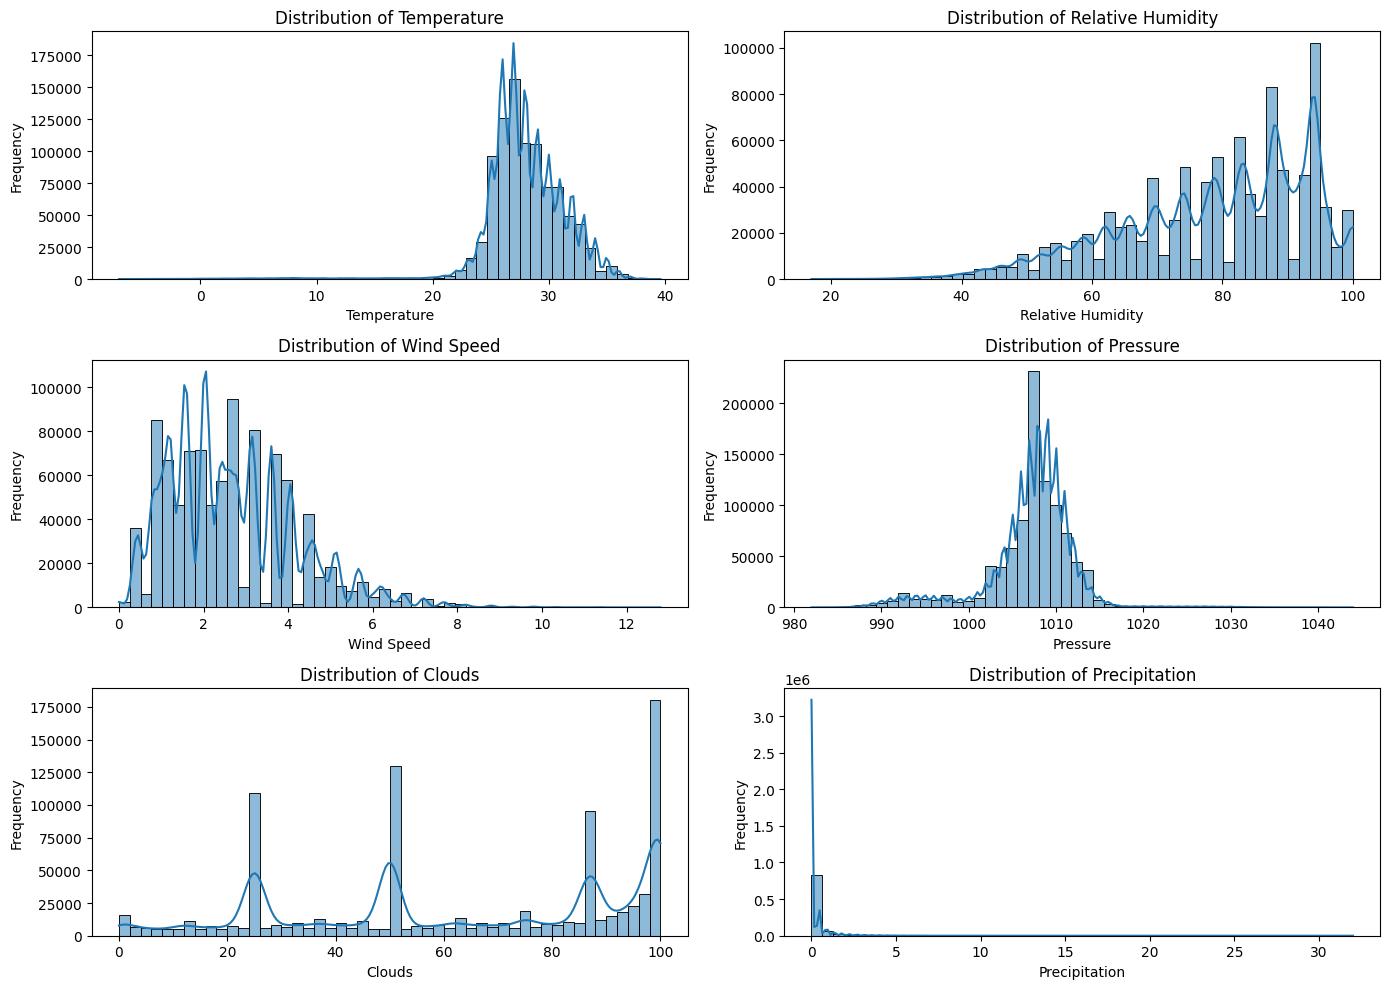

In [74]:
# Plot the distribution of key meteorological features to understand their overall patterns
cols = ['Temperature', 'Relative Humidity', 'Wind Speed',
        'Pressure', 'Clouds', 'Precipitation']

plt.figure(figsize=(14, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("key_feat_dist")
plt.show()


The histograms above illustrate the distribution of key weather-related variables in the dataset.  

- **Temperature** shows a near-normal distribution centered around 25–30°C, which is typical for many tropical and subtropical regions.  
- **Relative Humidity** is slightly skewed toward higher values, indicating that most observations occur under humid conditions.  
- **Wind Speed** has a strong right-skew, with most measurements below 5 m/s, reflecting generally calm weather.  
- **Pressure** is tightly clustered around 1010 hPa, suggesting stable atmospheric conditions.  
- **Cloud Coverage** exhibits several peaks, possibly due to rounding or discrete reporting intervals (e.g., 0%, 20%, 40%, etc.).  
- **Precipitation** is extremely right-skewed, with the majority of values near zero — consistent with occasional rainfall events rather than continuous rain.

Overall, these distributions indicate that the dataset mainly represents **stable weather conditions** with periodic variations, which are essential factors influencing air quality.

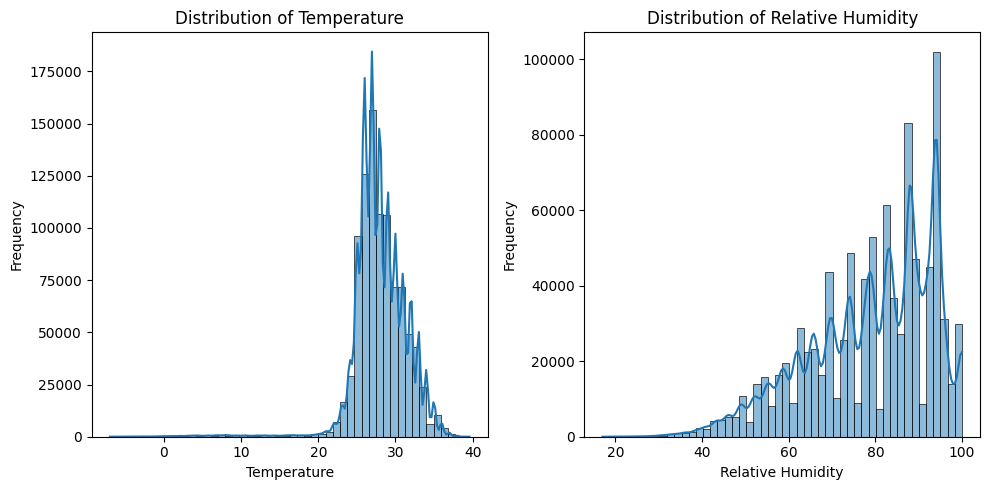

In [75]:
# Plot the distribution of key meteorological features to understand their overall patterns
cols = ['Temperature', 'Relative Humidity']

plt.figure(figsize=(10, 5))

# for i, col in enumerate(cols, 1):
#     plt.subplot(3, 2, i)
#     sns.histplot(df[col].dropna(), bins=50, kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')

for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.savefig("key_feat_dist_1")
plt.show()

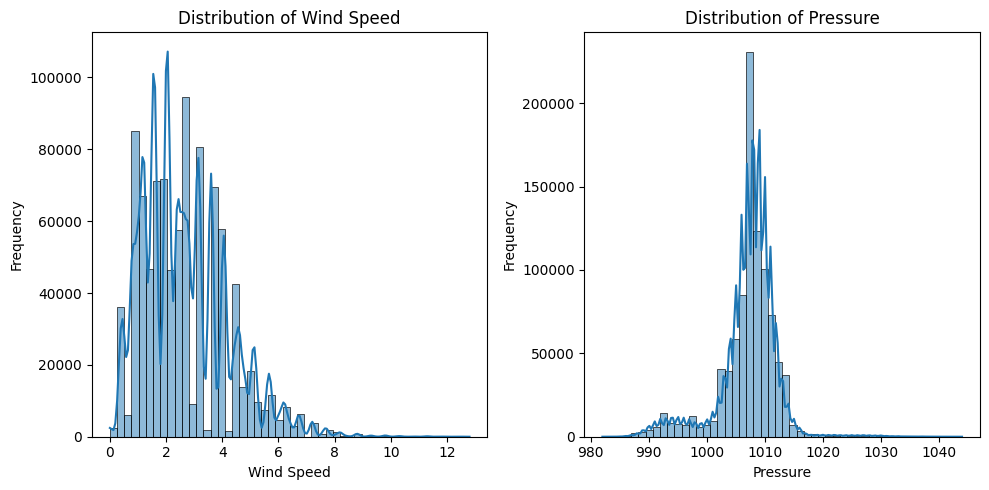

In [76]:
# Plot the distribution of key meteorological features to understand their overall patterns
cols = ['Wind Speed',
        'Pressure']

plt.figure(figsize=(10, 5))

# for i, col in enumerate(cols, 1):
#     plt.subplot(3, 2, i)
#     sns.histplot(df[col].dropna(), bins=50, kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')

for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("key_feat_dist_2")
plt.show()

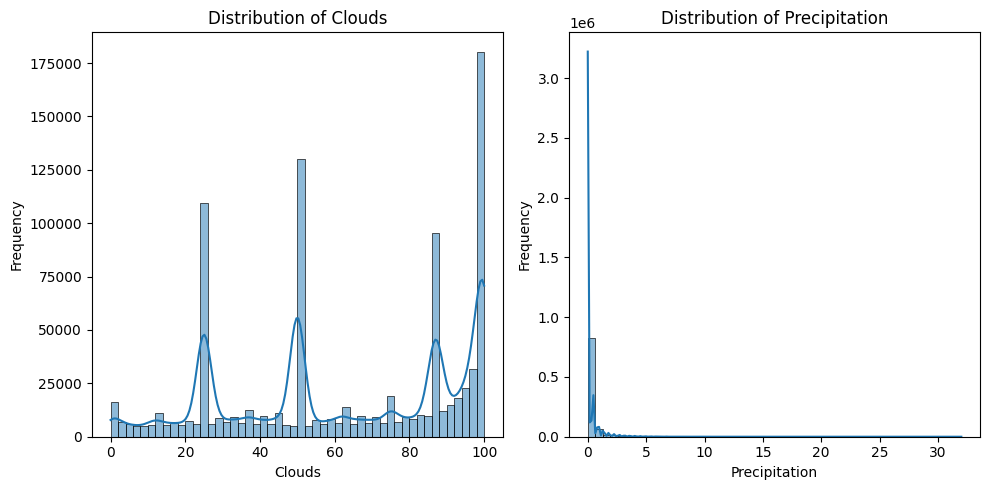

In [77]:
# Plot the distribution of key meteorological features to understand their overall patterns
cols = ['Clouds', 'Precipitation']

plt.figure(figsize=(10, 5))

# for i, col in enumerate(cols, 1):
#     plt.subplot(3, 2, i)
#     sns.histplot(df[col].dropna(), bins=50, kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')

for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("key_feat_dist_3")
plt.show()

### 4. Temporal Analysis

In [78]:
# Reset index for plotting
df_reset = df.reset_index()

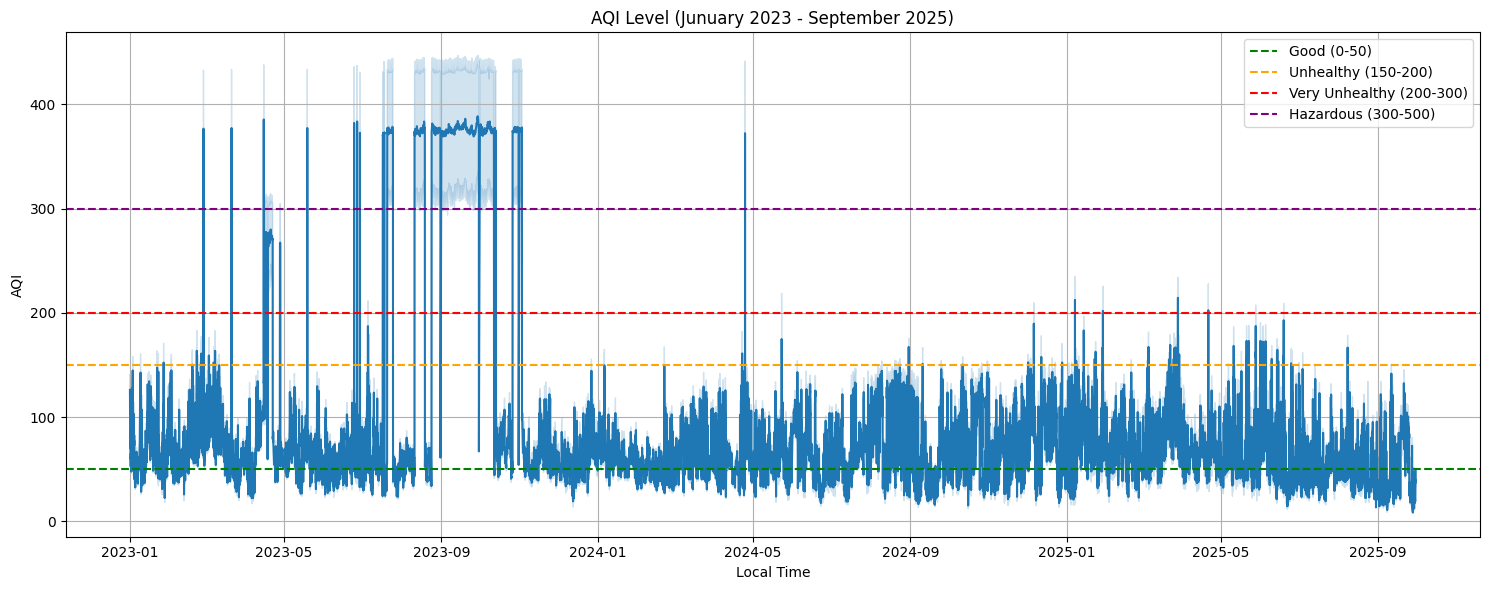

Time with the highest AQI level: ((Timestamp('2023-02-27 09:00:00'), 'Cần Giuộc'), 500)


In [79]:
# Plot the AQI time series line plot
plt.figure(figsize=(15, 6))
# df_reset['Aqi'].plot(kind='line')
sns.lineplot(x='Local Time', y='Aqi', data=df_reset)

# Add labels and title
plt.xlabel('Local Time')
plt.ylabel('AQI')
plt.title('AQI Level (Junuary 2023 - September 2025)')
# Add horizontal lines for unhealthy levels
plt.axhline(y=50, color='green', linestyle='--', label='Good (0-50)')
plt.axhline(y=150, color='orange', linestyle='--', label='Unhealthy (150-200)')
plt.axhline(y=200, color='red', linestyle='--', label='Very Unhealthy (200-300)')
plt.axhline(y=300, color='purple', linestyle='--', label='Hazardous (300-500)')

# Show legend
plt.legend()
# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the time with the highest AQI level
highest_aqi_time = df['Aqi'].idxmax(), df['Aqi'].max()
print("Time with the highest AQI level:", highest_aqi_time)


The time-series plot illustrates the variation of **Air Quality Index (AQI)** from **January 2023 to September 2025**.  
Overall, AQI levels fluctuate significantly over time, showing both **short-term spikes** and **seasonal patterns**.

- Most AQI values remain below **150**, corresponding to the *Good* to *Moderate* range.  
- However, there are several **sharp peaks exceeding 300–400**, representing *Very Unhealthy* or even *Hazardous* air quality events.  
- These extreme spikes may be caused by **temporary pollution surges**, such as industrial emissions, traffic congestion, or weather inversions.  
- The recurring fluctuations suggest that **air quality is seasonally influenced**, possibly deteriorating during dry or stagnant weather periods.

In summary, while the general air quality tends to stay within acceptable limits, **occasional severe pollution events** highlight the importance of continuous monitoring and predictive modeling.

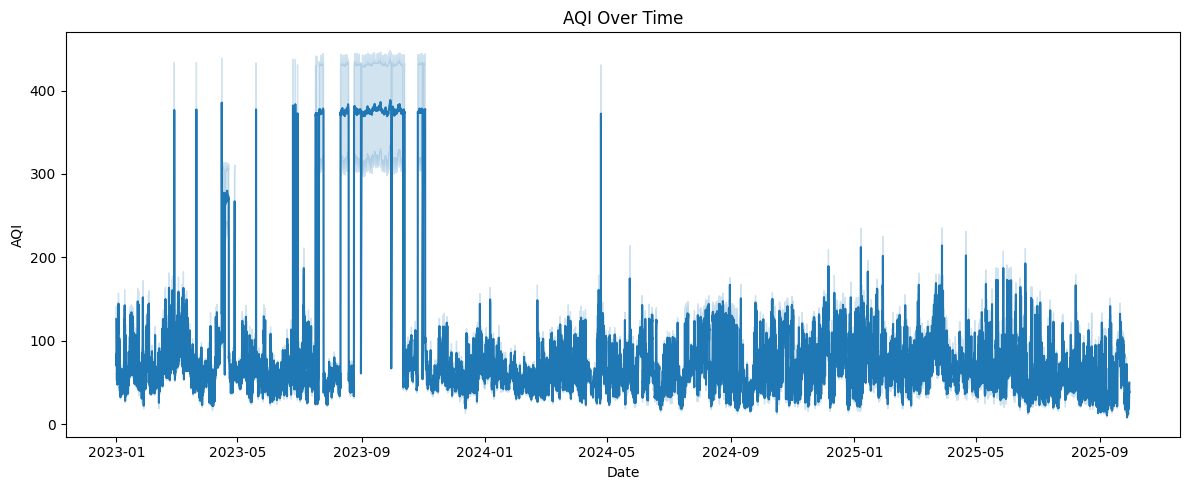

In [80]:
# Plot AQI over time
plt.figure(figsize=(12, 5))
sns.lineplot(x='Local Time', y='Aqi', data=df_reset)
plt.title("AQI Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.tight_layout()
plt.show()

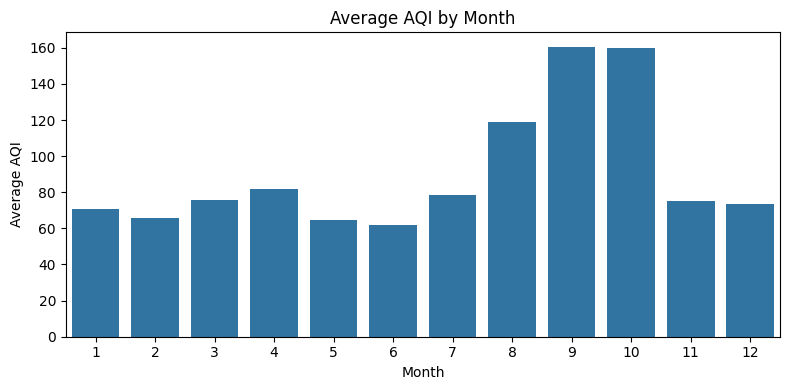

In [81]:
# Plot monthly AQI variation
df_reset['Month'] = df_reset['Local Time'].dt.month
monthly_aqi = df_reset.groupby('Month')['Aqi'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Month', y='Aqi', data=monthly_aqi)
plt.title("Average AQI by Month")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.tight_layout()
plt.show()

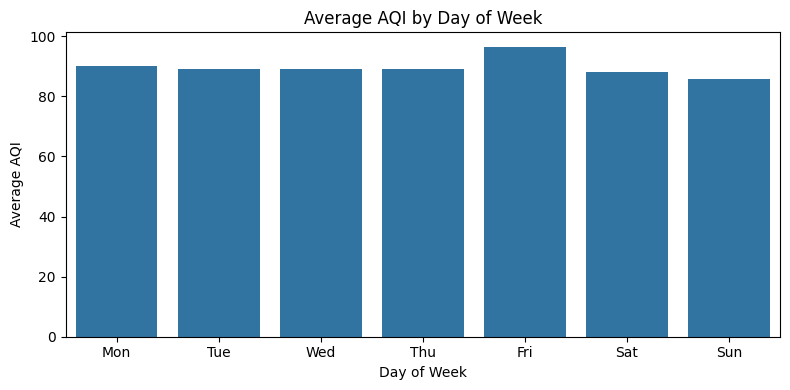

In [82]:
# Plot average AQI by day of week
df_reset['DayOfWeek'] = df_reset['Local Time'].dt.dayofweek  # 0=Monday, 6=Sunday
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekly_aqi = df_reset.groupby('DayOfWeek')['Aqi'].mean().reset_index()
weekly_aqi['Day'] = weekly_aqi['DayOfWeek'].map(dict(enumerate(day_names)))

plt.figure(figsize=(8, 4))
sns.barplot(x='Day', y='Aqi', data=weekly_aqi)
plt.title("Average AQI by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average AQI")
plt.tight_layout()
plt.show()

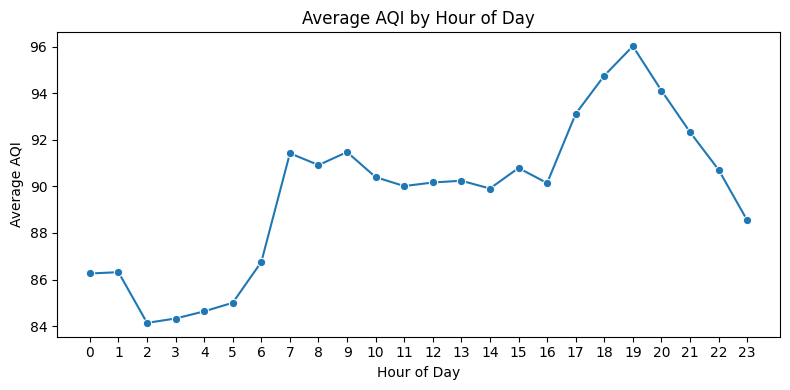

In [83]:
# Plot average AQI by hour of day
df_reset['Hour'] = df_reset['Local Time'].dt.hour
hourly_aqi = df_reset.groupby('Hour')['Aqi'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(x='Hour', y='Aqi', data=hourly_aqi, marker='o')

plt.xticks(range(0, 24))
plt.title("Average AQI by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average AQI")
plt.tight_layout()
plt.show()

The line chart illustrates the average **Air Quality Index (AQI)** across different hours of the day.  
A clear **diurnal pattern** can be observed:

- AQI values are **lowest during the early morning hours** (around 2–5 AM), when traffic and industrial activity are minimal.  
- Starting from **6–8 AM**, AQI rises sharply, likely due to the **morning rush hour** and increased human activity.  
- After a relatively stable period throughout midday, AQI peaks again in the **evening (around 6–8 PM)** — another common time of heavy traffic and lower atmospheric dispersion.  
- The AQI then gradually decreases late at night as activities decline.

Overall, this daily pattern suggests that **human activities and traffic emissions** play a major role in short-term air quality fluctuations.

### 5. Correlation Analysis

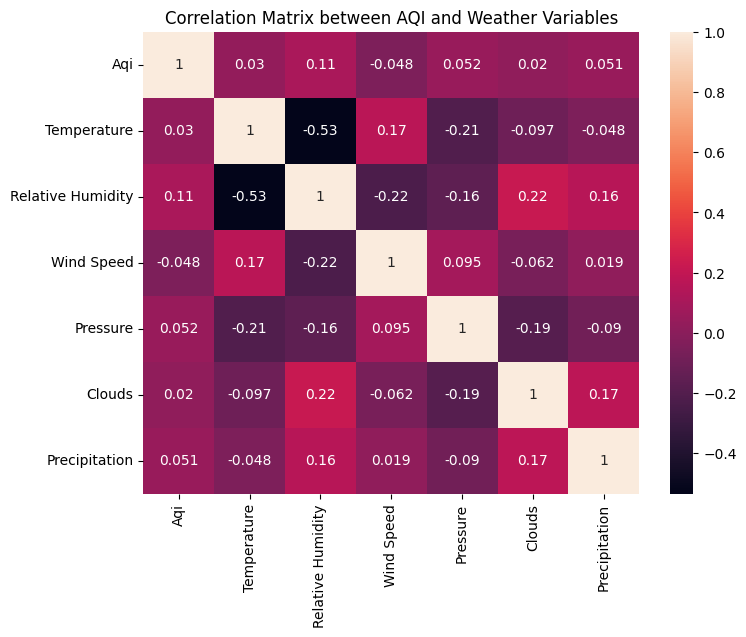

In [84]:
# Compute and visualize the correlation matrix between AQI and key weather variables
corr = df[['Aqi', 'Temperature', 'Relative Humidity', 'Wind Speed', 'Pressure', 'Clouds', 'Precipitation']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix between AQI and Weather Variables')
plt.show()

The heatmap displays the correlation matrix between **Air Quality Index (AQI)** and several meteorological factors.  
Overall, the correlations are relatively weak, suggesting that AQI is influenced by multiple complex factors rather than a single dominant variable.

Key observations:

- **Temperature** shows a **slight negative correlation** with **Relative Humidity (-0.53)**, which is expected since warmer air can hold more moisture.  
- **AQI** has a **weak positive correlation** with **Relative Humidity (0.11)** and **Pressure (0.05)**, indicating that higher humidity and stable pressure may slightly worsen air quality due to pollutant accumulation.  
- **Wind Speed** exhibits a **small negative correlation** with AQI (-0.048), implying that stronger winds help disperse pollutants.  
- **Clouds** and **Precipitation** show almost no direct relationship with AQI, but precipitation could have indirect effects through pollutant removal.

In summary, while no single weather variable strongly determines AQI, the combined influence of **humidity, pressure, and wind** likely plays a role in shaping air quality variations.

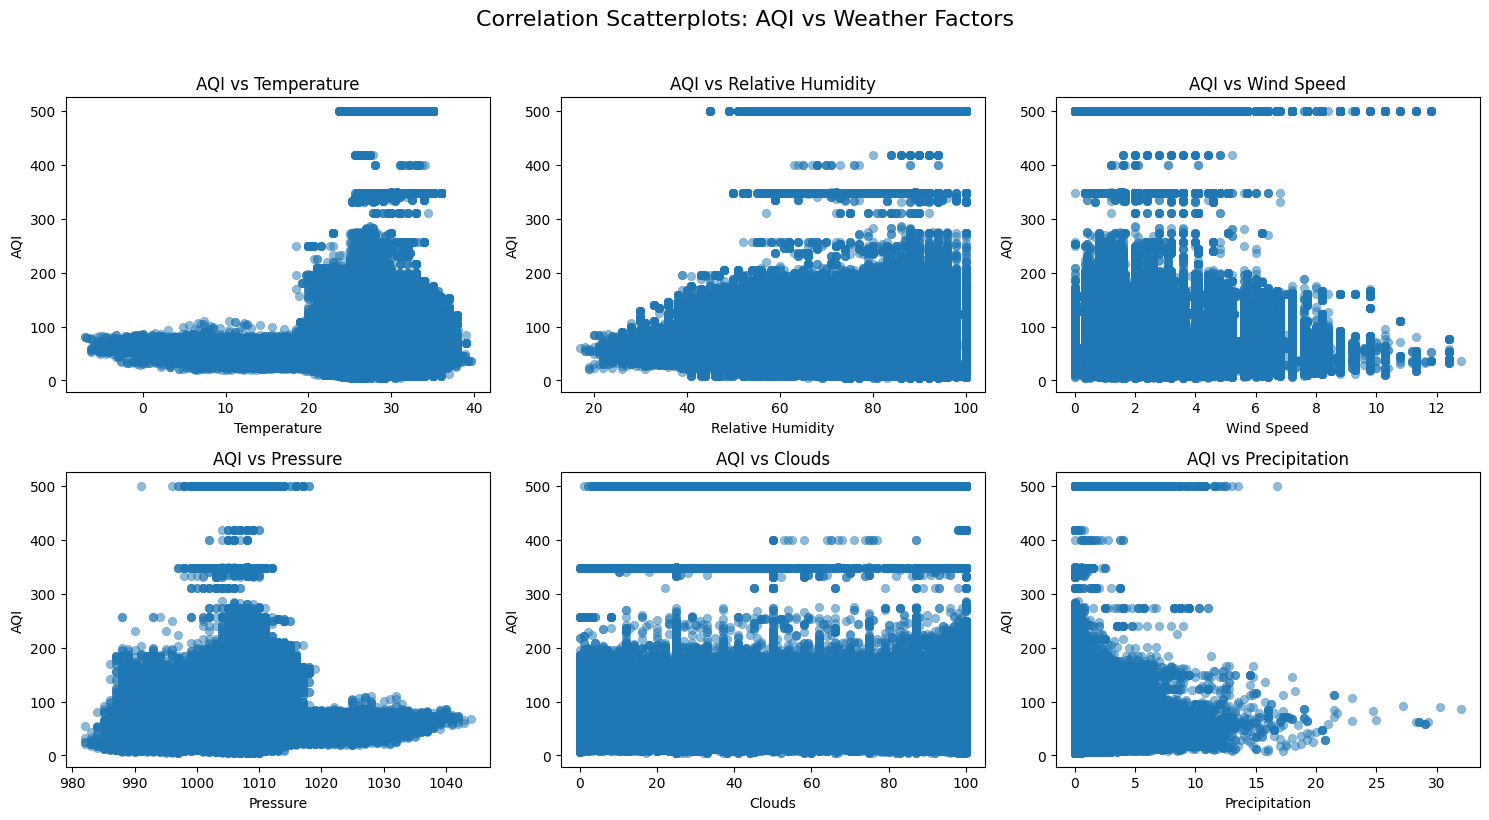

In [85]:
# Create scatterplots to visualize the relationships between AQI and each weather feature
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Correlation Scatterplots: AQI vs Weather Factors', fontsize=16, y=1.02)

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(
        x=feature,
        y='Aqi',
        data=df.reset_index(),
        ax=axes[i],
        alpha=0.5,
        edgecolor=None
    )
    axes[i].set_title(f'AQI vs {feature}', fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('AQI')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Create scatterplots to visualize the relationships between AQI and each weather feature
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Correlation Scatterplots: AQI vs Weather Factors', fontsize=16, y=1.02)

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(
        x=feature,
        y='Aqi',
        data=df.reset_index(),
        ax=axes[i],
        alpha=0.5,
        edgecolor=None
    )
    axes[i].set_title(f'AQI vs {feature}', fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('AQI')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Create scatterplots to visualize the relationships between AQI and each weather feature
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Correlation Scatterplots: AQI vs Weather Factors', fontsize=16, y=1.02)

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(
        x=feature,
        y='Aqi',
        data=df.reset_index(),
        ax=axes[i],
        alpha=0.5,
        edgecolor=None
    )
    axes[i].set_title(f'AQI vs {feature}', fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('AQI')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The scatterplots visualize the relationships between **AQI** and major **meteorological variables**.  
Although the relationships are generally weak, several meaningful patterns can be observed:

- **Temperature vs AQI:** There is a slightly negative trend — higher temperatures tend to correspond with lower AQI, suggesting that warmer conditions may promote pollutant dispersion.  
- **Relative Humidity vs AQI:** A weak positive relationship is visible; higher humidity often coincides with increased AQI, possibly due to stagnant air conditions that trap pollutants.  
- **Wind Speed vs AQI:** A clear negative relationship appears — stronger winds are associated with lower AQI, indicating the cleansing effect of air movement.  
- **Pressure vs AQI:** AQI slightly increases under higher pressure, consistent with stable atmospheric conditions that limit vertical air mixing.  
- **Clouds vs AQI:** The relationship is weak and scattered, showing no consistent pattern.  
- **Precipitation vs AQI:** As precipitation increases, AQI tends to decrease, confirming the **washout effect** of rain in removing airborne pollutants.

Overall, these plots reinforce that **wind speed, humidity, temperature, and precipitation** are key factors influencing air quality variation, though their effects are subtle and interdependent.

### 6. Conclusion

**Southeast Vietnam’s Weather:**  
- ***Temperature***: The region maintains a warm tropical climate, with temperatures mostly between 25–30°C throughout the year.  
- ***Humidity***: High year-round humidity (above 75%) creates a persistently moist atmosphere.  
- ***Pressure***: Stable around 1010 hPa, indicating calm and consistent weather conditions.  
- ***Wind speed***: Generally low (<5 m/s), though stronger winds occasionally enhance air dispersion.  
- ***Precipitation***: Highly variable and right-skewed — most days are dry, with short but intense rain events during the wet season.  

**Southeast Vietnam’s Air Quality:**  
- ***AQI***: Average AQI remains below 150 (*Good–Moderate*), but peaks above 300 occur occasionally, indicating *Very Unhealthy* to *Hazardous* pollution episodes.  
- ***Daily pattern***: AQI is lowest during early morning (2–5 AM) and highest around rush hours (6–8 AM, 6–8 PM), reflecting the impact of traffic emissions.  
- ***Outliers***: Around 6% of data points are pollution spikes, consistent with real pollution events.  

**Effect of Weather on Air Quality:**  
- Higher **temperature** → lower AQI  
- Higher **humidity** → slightly higher AQI  
- Higher **pressure** → higher AQI  
- Higher **wind speed** → lower AQI  
- **Rainfall** helps wash out pollutants and improve air quality  

In [86]:
average_aqi_by_season = df_reset.groupby('Season')['Aqi'].mean()
display(average_aqi_by_season)

KeyError: 'Season'

In [ ]:
print(average_aqi_by_season)

In [ ]:
plt.figure(figsize=(6, 4))
average_aqi_by_season.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average AQI by Season')
plt.xlabel('Season')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
def get_day_type(dayofweek):
    if dayofweek >= 0 and dayofweek <= 4:
        return 'Weekday'
    else:
        return 'Weekend'

df_reset['DayOfWeek'] = df_reset['Local Time'].dt.dayofweek  # 0=Monday, 6=Sunday
df_reset['Day Type'] = df_reset['DayOfWeek'].apply(get_day_type)
display(df_reset.head())

In [ ]:
average_aqi_by_day_type = df_reset.groupby('Day Type')['Aqi'].mean()
display(average_aqi_by_day_type)

In [ ]:
plt.figure(figsize=(6, 4))
average_aqi_by_day_type.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average AQI by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()